# Explore the fit results from `sncosmo`

Authors: Midori Rollins and Melissa Graham

Explore the values and correlations between the `sncosmo` fit parameters.

Since not all potential SNIa which were fit with `sncosmo` *are* Type Ia, this has limited utility.

No conclusion are drawn from these plots.

This notebook contains extra narrative and explanations as it was used as a teaching tool for a new-to-SNIa student.

## Set up and read in the data

Import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

Read in the `sncosmo` results.

In [2]:
fnm = '2_all_potential_snia_fits/results_sncosmos.dat'

fit_cand = np.loadtxt(fnm, dtype='str', usecols=(0))
fit_est_z = np.loadtxt(fnm, dtype='float', usecols=(1))
fit_in_zlo = np.loadtxt(fnm, dtype='float', usecols=(2))
fit_in_zhi = np.loadtxt(fnm, dtype='float', usecols=(3))
fit_z = np.loadtxt(fnm, dtype='float', usecols=(4))
fit_ze = np.loadtxt(fnm, dtype='float', usecols=(5))
fit_t0 = np.loadtxt(fnm, dtype='float', usecols=(6))
fit_t0e = np.loadtxt(fnm, dtype='float', usecols=(7))
fit_x0 = np.loadtxt(fnm, dtype='float', usecols=(8))
fit_x0e = np.loadtxt(fnm, dtype='float', usecols=(9))
fit_x1 = np.loadtxt(fnm, dtype='float', usecols=(10))
fit_x1e = np.loadtxt(fnm, dtype='float', usecols=(11))
fit_c = np.loadtxt(fnm, dtype='float', usecols=(12))
fit_ce = np.loadtxt(fnm, dtype='float', usecols=(13))

fit_pmB = np.loadtxt(fnm, dtype='float', usecols=(14))
fit_pmg = np.loadtxt(fnm, dtype='float', usecols=(15))
fit_pmr = np.loadtxt(fnm, dtype='float', usecols=(16))
fit_pmi = np.loadtxt(fnm, dtype='float', usecols=(17))

del fnm

And the review flags from MLG.

In [3]:
fnm = '2_all_potential_snia_fits/MLG_review_ratings.txt'
mlg_review_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
mlg_review_flag = np.loadtxt(fnm, dtype='int', usecols=(1))
del fnm

fit_mlgflag = np.zeros(len(fit_cand), dtype='int') - 1
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mlg_review_candid)[0]
    if len(tx) == 1:
        fit_mlgflag[c] = mlg_review_flag[tx[0]]
    del tx

MR's flags were from a different set of flagging definitions.

In [4]:
# fnm = '2_all_potential_snia_fits/MR_review_ratings.txt'
# mr_rating_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
# mr_rating_flag   = np.loadtxt(fnm, dtype='int', usecols=(1))
# del fnm

# fit_mrflag = np.zeros(len(fit_cand), dtype='int') - 1
# for c, candid in enumerate(fit_cand):
#     tx = np.where(candid == mr_rating_candid)[0]
#     if len(tx) == 1:
#         fit_mrflag[c] = mr_rating_flag[tx]
#     del tx

## A primer on the SALT2 fit parameters

We have used `sncosmo` with the SALT-2 lightcurve fitter,
(<a href="https://ui.adsabs.harvard.edu/abs/2007A%26A...466...11G/abstract">Guy et al. 2007</a>).

The five fit parameters are:
 * `z`  : redshift
 * `t0` : time of peak brightness (MJD)
 * `x0` : flux normalization (a proxy for peak brightness)
 * `x1` : a proxy for lightcurve decline rate (or stretch factor)
 * `c`  : color offset
 
### `z` and `t0`

The fit redshift and time of peak brightness are self-explanatory.

### `x0` 

This is the SED normalization in the SALT2 fits, and a conversion from it to 
peak apparent brightness can be done with 
$m_{B} = −2.5\log(x_{0}) + 10.635$ 
from <a href="https://arxiv.org/abs/1401.4065">Mosher et al. (2014)</a>.

However, this conversion isn't necessary as the peak brightness in Bessel B and sdss g, r, and i 
are all in the fit results file already.

### `x1`

#### Decline rate

$\Delta m_{15}$ is the change in magnitude (it is standard to report this in the B-band)
during the first 15 days after peak brightness, and is commonly refered to as the
decline rate.

Section 5 of Guy+07 gives the conversion between $x_1$ and $\Delta m_{15}$ as:

> $\Delta m_{15} = 1.09 - 0.161x_{1} + 0.013x_{1}^{2} - 0.00130x_{1}^{3}$

SNIa with a larger value of $\Delta m_{15}$ decline faster, and typically have reached
fainter peak brightness.

#### Stretch

The stretch parameter, $s$, is another parameterization of the width or decline rate
of the SNIa which also incorporates the rise time, and was defined in
<a href="https://ui.adsabs.harvard.edu/abs/1997ApJ...483..565P/abstract">Perlmutter et al. 1997</a>.

Section 5 of Guy+07 gives the conversion between $x_1$ and $s$ as:

> $s = 0.98 + 0.091 x_1 + 0.003 x_1^2 - 0.00075 x_1^3$

SNIa with a larger stretch value have a narrower-width light curve that has reached a fainter peak.

### `c` 

Section 2 of Guy+07 describes this as 
*"...a color offset with respect to the average at the date maximum luminosity in B-band, 
$c = (B-V)_{\rm MAX} - \left< B-V \right>$"*.

In this case, $(B-V)_{\rm MAX}$ is the color of the fit SNIa at maximum, 
and $\left< B-V \right>$ is the average color for SNIa in general.

What does the value of $c$ indicate about the fit SNIa's color? Let's reason it out:
 * When $c < 0$, that means $(B-V)_{\rm MAX} < \left< B-V \right>$.
 * The fit SNIa has a $B-V$ value that is lower than average.
 * This means either $B$ is smaller or $V$ is larger.
 * Since we're in magnitudes, that means $B$ is brighter or $V$ is fainter.
 * And $B$ being brighter or $V$ being fainter means the SNIa is *bluer*.
 * So when $c < 0$, the fit SNIa is bluer than a typical SNIa.
 * And vice versa, when $c > 0$ the fit SNIa is redder than a typical SNIa.

This is important to understand because SNIa that are intrinsically brighter are also intrinsically bluer.

## Convert parameters and calculate errors

### Convert `x1` to $\Delta m_{15}$ and stretch

Propagate the errors.

#### $\Delta m_{15}$

In [5]:
fit_dm15 = 1.09 - 0.161*fit_x1 + 0.013*fit_x1**2 - 0.00130*fit_x1**3
fit_dm15e = np.zeros(len(fit_dm15), dtype='float')
for c in range(len(fit_dm15)):
    if fit_x1e[c] > 0:
        temp = np.random.normal(loc=fit_x1[c], scale=fit_x1e[c], size=10000)
        temp2 = 1.09 - 0.161*temp + 0.013*temp**2 - 0.00130*temp**3
        fit_dm15e[c] = np.std(temp2)
        del temp, temp2
    else:
        fit_dm15e[c] = -99.9

#### Stretch

In [6]:
fit_s = 0.98 + 0.091*fit_x1 + 0.003*fit_x1**2 - 0.00075*fit_x1**3
fit_se = np.zeros(len(fit_s), dtype='float')
for c in range(len(fit_s)):
    if fit_x1e[c] > 0:
        temp = np.random.normal(loc=fit_x1[c], scale=fit_x1e[c], size=10000)
        temp2 = 0.98 + 0.091*temp + 0.003*temp**2 - 0.00075*temp**3
        fit_se[c] = np.std(temp2)
        del temp, temp2
    else:
        fit_se[c] = -99.9

#### Plot distributions of `x1` and $\Delta m_{15}$

Plot the distributions of $x_1$, $\Delta m_{15}$, and stretch for values of $x_1 < 10$ (removes most negative $\Delta m_{15}$ values).

Green are the flagged candidates, and black lines are the unflagged candidates.

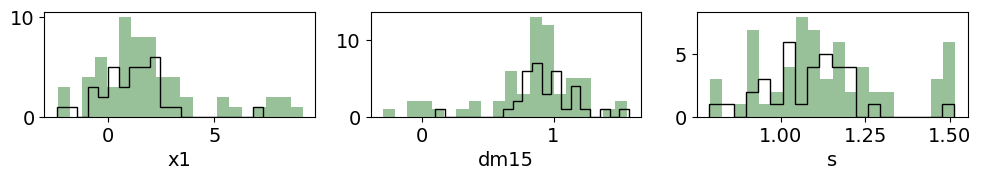

In [7]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0) & (fit_x1 < 10))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0) & (fit_x1 < 10))[0]

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 3, figsize=(10, 2))
nbins=20

ax[0].hist(fit_x1[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[0].hist(fit_x1[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[0].set_xlabel('x1')

ax[1].hist(fit_dm15[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[1].hist(fit_dm15[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[1].set_xlabel('dm15')

ax[2].hist(fit_s[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[2].hist(fit_s[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[2].set_xlabel('s')

fig.tight_layout()
fig.show()

### Estimate peak intrinsic magnitude: $M_B$

Since we have the redshift from the fit, determine the distance modulus and
calculate the peak intrinsic magnitude of each potential SNIa.

The simple way to do this is to use $\mu = m-M$ where $\mu = 5log(D_L) + 25$.

In [8]:
fit_MB = np.zeros(len(fit_pmB), dtype='float')
tx = np.where(fit_z > 0.0)[0]
fit_MB[tx] = fit_pmB[tx] - (5. * np.log10(cosmo.luminosity_distance(fit_z[tx]).value) + 25.)
del tx

#### Calculate and propagate error

Derive an error in peak brightness from the error in the fit value of `x0`.

In [9]:
fit_pmfe = np.zeros(len(fit_x0e), dtype='float')
for c in range(len(fit_x0e)):
    if fit_x0e[c] > 0:
        temp = np.random.normal(loc=fit_x0[c], scale=fit_x0e[c], size=10000)
        tx = np.where(temp > 0)[0]
        temp2 = -2.5 * np.log10(temp[tx]) + 10.635
        fit_pmfe[c] = np.std(temp2)
        del temp, temp2
    else:
        fit_pmfe[c] = -99.9

In [10]:
fit_MBe = np.zeros(len(fit_MB), dtype='float')
for c in range(len(fit_MB)):
    if fit_z[c] > 0.0:
        temp = np.random.normal(loc=fit_z[c], scale=fit_ze[c], size=10000)
        temp2 = np.random.normal(loc=fit_pmB[c], scale=fit_pmfe[c], size=10000)
        tx = np.where(temp > 0)[0]
        temp3 = temp2[tx] - (5. * np.log10(cosmo.luminosity_distance(temp[tx]).value) + 25.)
        fit_MBe[c] = np.std(temp3)
        del temp, temp2, temp3
    else:
        fit_MBe[c] = -99.9

#### Plot distribution of estimated $M_B$

Histogram of estimated peak intrinsic brightnesses, again for values of $x_1<10$.

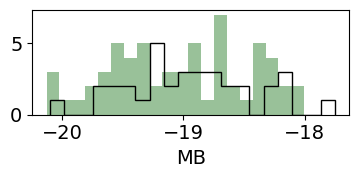

In [11]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0) & (fit_x1 < 10))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0) & (fit_x1 < 10))[0]

fig = plt.figure(figsize=(4, 2))
plt.hist(fit_MB[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkgreen')
plt.hist(fit_MB[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
plt.xlabel('MB')

fig.tight_layout()
plt.show()

## Plot correlations between parameters

### SALT2 parameters vs redshift

Including the error bars in the plot is optional.

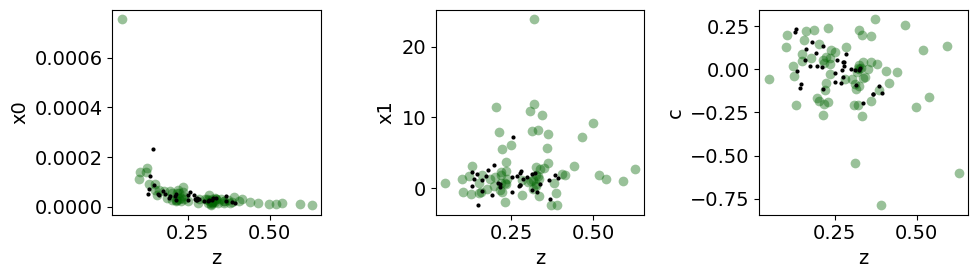

In [12]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0))[0]

fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=False)

# ax[0].errorbar(fit_z[tx], fit_x0[tx], fmt='.', xerr=fit_ze[tx], yerr=fit_x0e[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[0].errorbar(fit_z[mlgx], fit_x0[mlgx], fmt='.', xerr=fit_ze[mlgx], yerr=fit_x0e[mlgx], 
#                mew=0, color='black', zorder=1)
ax[0].plot(fit_z[tx], fit_x0[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[0].plot(fit_z[mlgx], fit_x0[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[0].set_xlabel('z')
ax[0].set_ylabel('x0')

# ax[1].errorbar(fit_z[tx], fit_x1[tx], fmt='.', xerr=fit_ze[tx], yerr=fit_x1e[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[1].errorbar(fit_z[mlgx], fit_x1[mlgx], fmt='.', xerr=fit_ze[mlgx], yerr=fit_x1e[mlgx], 
#                mew=0, color='black', zorder=1)
ax[1].plot(fit_z[tx], fit_x1[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[1].plot(fit_z[mlgx], fit_x1[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[1].set_xlabel('z')
ax[1].set_ylabel('x1')

# ax[2].errorbar(fit_z[tx], fit_c[tx], fmt='.', xerr=fit_ze[tx], yerr=fit_ce[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[2].errorbar(fit_z[mlgx], fit_c[mlgx], fmt='.', xerr=fit_ze[mlgx], yerr=fit_ce[mlgx], 
#                mew=0, color='black', zorder=1)
ax[2].plot(fit_z[tx], fit_c[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[2].plot(fit_z[mlgx], fit_c[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[2].set_xlabel('z')
ax[2].set_ylabel('c')

fig.tight_layout()
fig.show()

As expected, `x0` (peak apparent magnitude) is correlated with redshift.

The value of `x1` (light curve decline rate / stretch) does not appear to be correlated with redshift for this sample (as expected; while it is correlated with host galaxy SFR and more higher-redshift galaxies have higher SFR, it's not surprising to not see a trend here).

The value of `c` (color offset from 'normal') does appear to be correlated with redshift.

Recall _"when $c < 0$, the fit SNIa is bluer than a typical SNIa"_.

So the lightcurves with low redshifts, z<0.22, have been fit as redder (as in, intrinsically redder) than a typical SNIa.
This apparent trend between color and redshift could be due to host dust extinction: if an event is extincted,
it is redder and fainter, and we're more likely to detect fainter objects if they're at lower redshifts.
It could also be due to contaminates, non-SNIa that are fit as "red SNIa".
However, recall that the candidate light curves were not corrected for MW extinction prior to running
sncosmo. This was an oversight but since the fit parameters turned out not to be very useful, don't go
back to rerun. We picked low-extinction deep fields anyway.

Generally, probably not too much can be taken away from these plots given our sample is just potential SNIa.

### SALT2 parameters vs each other

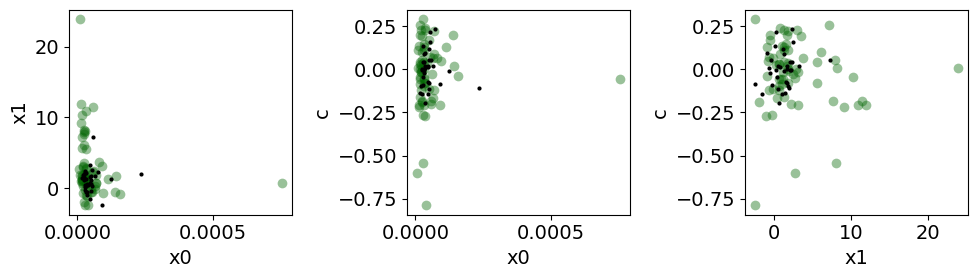

In [13]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0))[0]

fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=False, sharey=False)

# ax[0].errorbar(fit_x0[tx], fit_x1[tx], fmt='.', xerr=fit_x0e[tx], yerr=fit_x1e[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[0].errorbar(fit_x0[mlgx], fit_x1[mlgx], fmt='.', xerr=fit_x0e[mlgx], yerr=fit_x1e[mlgx], 
#                mew=0, color='black', zorder=1)
ax[0].plot(fit_x0[tx], fit_x1[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[0].plot(fit_x0[mlgx], fit_x1[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[0].set_xlabel('x0')
ax[0].set_ylabel('x1')

# ax[1].errorbar(fit_x0[tx], fit_c[tx], fmt='.', xerr=fit_x0e[tx], yerr=fit_ce[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[1].errorbar(fit_x0[mlgx], fit_c[mlgx], fmt='.', xerr=fit_x0e[mlgx], yerr=fit_ce[mlgx], 
#                mew=0, color='black', zorder=1)
ax[1].plot(fit_x0[tx], fit_c[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[1].plot(fit_x0[mlgx], fit_c[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[1].set_xlabel('x0')
ax[1].set_ylabel('c')

# ax[2].errorbar(fit_x1[tx], fit_c[tx], fmt='.', xerr=fit_x1e[tx], yerr=fit_ce[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[2].errorbar(fit_x1[mlgx], fit_c[mlgx], fmt='.', xerr=fit_x1e[mlgx], yerr=fit_ce[mlgx], 
#                mew=0, color='black', zorder=1)
ax[2].plot(fit_x1[tx], fit_c[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[2].plot(fit_x1[mlgx], fit_c[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[2].set_xlabel('x1')
ax[2].set_ylabel('c')

fig.tight_layout()
fig.show()

Could expect some correlation between `c` and `x1`, color and light curve decline rate or stretch, but probably
not with `x0` as peak apparent brightness would be primarily correlated with redshift.

### Derived parameters vs redshift

Again for $x_1 < 10$.

Here we expect to see a clear trend between peak apparent magnitude and redshift, 
but not between redshift and stretch or $\Delta m_{15}$.

The approximate expected trend between $m$ and $z$ is shown as a blue line. 
We can see that the "low"-z (z<0.22) and "high"-z (z>0.45) candidates do not lie along this trend.

These could well be non-SNIa.

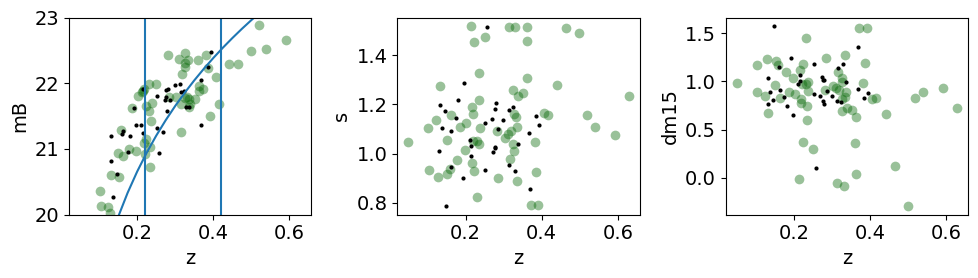

In [14]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0) & (fit_x1 < 10))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0) & (fit_x1 < 10))[0]

fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=False)

# ax[0].errorbar(fit_z[tx], fit_pmB[tx], fmt='.', xerr=fit_ze[tx], yerr=fit_pmfe[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[0].errorbar(fit_z[mlgx], fit_pmB[mlgx], fmt='.', xerr=fit_ze[mlgx], yerr=fit_pmfe[mlgx], 
#                mew=0, color='black', zorder=1)
ax[0].plot(fit_z[tx], fit_pmB[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[0].plot(fit_z[mlgx], fit_pmB[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[0].set_xlabel('z')
ax[0].set_ylabel('mB')

# add lines
temp_z = 0.10 + np.arange(20, dtype='float') / 40
temp_mB = -19.3 + (5. * np.log10(cosmo.luminosity_distance(temp_z).value) + 25.)
ax[0].plot(temp_z, temp_mB)
ax[0].axvline(0.22)
ax[0].axvline(0.42)
ax[0].set_ylim([20, 23])

# ax[1].errorbar(fit_z[tx], fit_s[tx], fmt='.', xerr=fit_ze[tx], yerr=fit_se[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[1].errorbar(fit_z[mlgx], fit_s[mlgx], fmt='.', xerr=fit_ze[mlgx], yerr=fit_se[mlgx], 
#                mew=0, color='black', zorder=1)
ax[1].plot(fit_z[tx], fit_s[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[1].plot(fit_z[mlgx], fit_s[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[1].set_xlabel('z')
ax[1].set_ylabel('s')

# ax[2].errorbar(fit_z[tx], fit_dm15[tx], fmt='.', xerr=fit_ze[tx], yerr=fit_dm15e[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[2].errorbar(fit_z[mlgx], fit_dm15[mlgx], fmt='.', xerr=fit_ze[mlgx], yerr=fit_dm15e[mlgx], 
#                mew=0, color='black', zorder=1)
ax[2].plot(fit_z[tx], fit_dm15[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[2].plot(fit_z[mlgx], fit_dm15[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[2].set_xlabel('z')
ax[2].set_ylabel('dm15')

fig.tight_layout()
fig.show()

### Derived parameters vs each other

We should see a trend between delta_m15 and stretch as they were both derived from x1. 

The delta_m15 parameter has a negative relationship with x1, stretch has positive relationship w/ x1, so delta_m15 and stretch should have negative relationship with each other, and that checks out here.

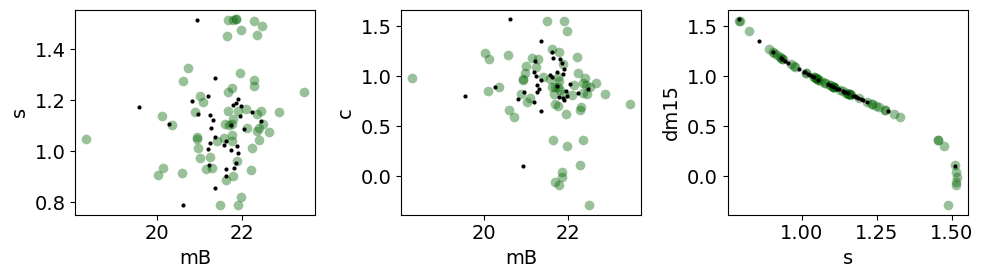

In [15]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0) & (fit_x1 < 10))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0) & (fit_x1 < 10))[0]

fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=False, sharey=False)

# ax[0].errorbar(fit_pmB[tx], fit_s[tx], fmt='.', xerr=fit_pmfe[tx], yerr=fit_se[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[0].errorbar(fit_pmB[mlgx], fit_s[mlgx], fmt='.', xerr=fit_pmfe[mlgx], yerr=fit_se[mlgx], 
#                mew=0, color='black', zorder=1)
ax[0].plot(fit_pmB[tx], fit_s[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[0].plot(fit_pmB[mlgx], fit_s[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[0].set_xlabel('mB')
ax[0].set_ylabel('s')

# ax[1].errorbar(fit_pmB[tx], fit_dm15[tx], fmt='.', xerr=fit_pmfe[tx], yerr=fit_dm15e[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[1].errorbar(fit_pmB[mlgx], fit_dm15[mlgx], fmt='.', xerr=fit_pmfe[mlgx], yerr=fit_dm15e[mlgx], 
#                mew=0, color='black', zorder=1)
ax[1].plot(fit_pmB[tx], fit_dm15[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[1].plot(fit_pmB[mlgx], fit_dm15[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[1].set_xlabel('mB')
ax[1].set_ylabel('c')

# ax[2].errorbar(fit_s[tx], fit_dm15[tx], fmt='.', xerr=fit_se[tx], yerr=fit_dm15e[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[2].errorbar(fit_s[mlgx], fit_dm15[mlgx], fmt='.', xerr=fit_se[mlgx], yerr=fit_dm15e[mlgx], 
#                mew=0, color='black', zorder=1)
ax[2].plot(fit_s[tx], fit_dm15[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[2].plot(fit_s[mlgx], fit_dm15[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[2].set_xlabel('s')
ax[2].set_ylabel('dm15')

fig.tight_layout()
fig.show()

### Intrinsic peak brightness and redshift

Here we **DO NOT** expect to see a trend.

And yet we do, which is concerning.

This could simply indicate that some of the lower- and higher-redshift objects are not SNIa.

Detection biases are likely also involved, in that high-redshift objects are better detected
when they're intrinsically bright.

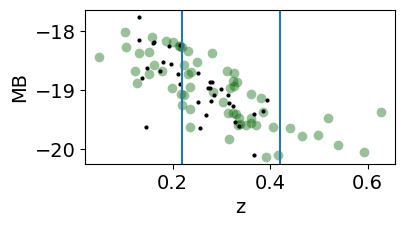

In [16]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0) & (fit_x1 < 10))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0) & (fit_x1 < 10))[0]

plt.figure(figsize=(4, 2))

# plt.errorbar(fit_z[tx], fit_MB[tx], fmt='.', xerr=fit_ze[tx], yerr=fit_MBe[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# plt.errorbar(fit_z[mlgx], fit_MB[mlgx], fmt='.', xerr=fit_ze[mlgx], yerr=fit_MBe[mlgx], 
#                mew=0, color='black', zorder=1)
plt.plot(fit_z[tx], fit_MB[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
plt.plot(fit_z[mlgx], fit_MB[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
plt.xlabel('z')
plt.ylabel('MB')

# add lines
plt.axvline(0.22)
plt.axvline(0.42)

plt.show()

### Lightcurve parameters vs. peak intrinsic magnitude

Here we do expect stretch and $\Delta m_{15}$ to be correlated with peak intrinsic magnitude.

This is commonly known as the Phillips relation, or the width-luminosity relation, from <a href="https://ui.adsabs.harvard.edu/abs/1993ApJ...413L.105P/abstract">Phillips et al. (1993)</a>.

We aren't seeing it super clearly here though, could be due to contamination from non-SNIa.

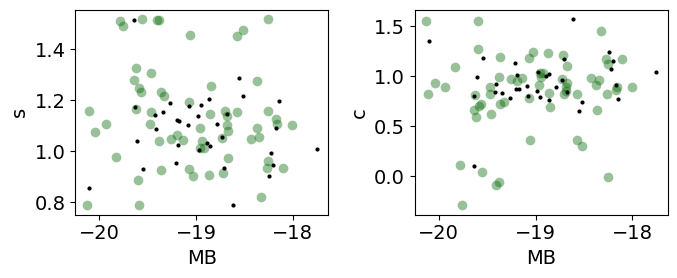

In [17]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0) & (fit_x1 < 10))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0) & (fit_x1 < 10))[0]

fig, ax = plt.subplots(1, 2, figsize=(7, 3), sharex=False, sharey=False)

# ax[0].errorbar(fit_MB[tx], fit_s[tx], fmt='.', xerr=fit_MBe[tx], yerr=fit_se[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[0].errorbar(fit_MB[mlgx], fit_s[mlgx], fmt='.', xerr=fit_MBe[mlgx], yerr=fit_se[mlgx], 
#                mew=0, color='black', zorder=1)
ax[0].plot(fit_MB[tx], fit_s[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[0].plot(fit_MB[mlgx], fit_s[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[0].set_xlabel('MB')
ax[0].set_ylabel('s')

# ax[1].errorbar(fit_MB[tx], fit_dm15[tx], fmt='.', xerr=fit_MBe[tx], yerr=fit_dm15e[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[1].errorbar(fit_MB[mlgx], fit_dm15[mlgx], fmt='.', xerr=fit_MBe[mlgx], yerr=fit_dm15e[mlgx], 
#                mew=0, color='black', zorder=1)
ax[1].plot(fit_MB[tx], fit_dm15[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[1].plot(fit_MB[mlgx], fit_dm15[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[1].set_xlabel('MB')
ax[1].set_ylabel('c')

fig.tight_layout()
fig.show()

Can we see it if we limit to just the redshifts within which we're likely SNIa-dominated?

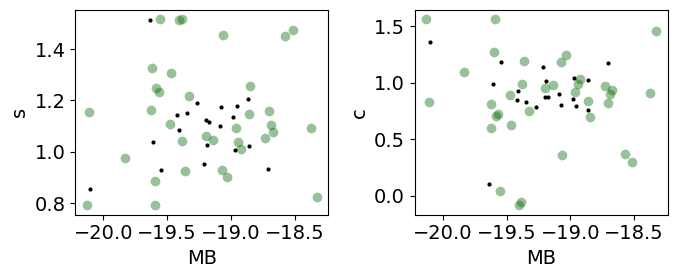

In [18]:
tx = np.where((fit_z > 0.22) & (fit_z < 0.42) & (fit_mlgflag != 0) & (fit_x1 < 10))[0]
mlgx = np.where((fit_z > 0.22) & (fit_z < 0.42) & (fit_mlgflag == 0) & (fit_x1 < 10))[0]

fig, ax = plt.subplots(1, 2, figsize=(7, 3), sharex=False, sharey=False)

# ax[0].errorbar(fit_MB[tx], fit_s[tx], fmt='.', xerr=fit_MBe[tx], yerr=fit_se[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[0].errorbar(fit_MB[mlgx], fit_s[mlgx], fmt='.', xerr=fit_MBe[mlgx], yerr=fit_se[mlgx], 
#                mew=0, color='black', zorder=1)
ax[0].plot(fit_MB[tx], fit_s[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[0].plot(fit_MB[mlgx], fit_s[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[0].set_xlabel('MB')
ax[0].set_ylabel('s')

# ax[1].errorbar(fit_MB[tx], fit_dm15[tx], fmt='.', xerr=fit_MBe[tx], yerr=fit_dm15e[tx], 
#                alpha=0.4, mew=0, color='darkgreen', zorder=1)
# ax[1].errorbar(fit_MB[mlgx], fit_dm15[mlgx], fmt='.', xerr=fit_MBe[mlgx], yerr=fit_dm15e[mlgx], 
#                mew=0, color='black', zorder=1)
ax[1].plot(fit_MB[tx], fit_dm15[tx], 'o', ms=7, mew=0, color='darkgreen', alpha=0.4, zorder=2)
ax[1].plot(fit_MB[mlgx], fit_dm15[mlgx], 'o', ms=3, mew=0, color='black', zorder=2)
ax[1].set_xlabel('MB')
ax[1].set_ylabel('c')

fig.tight_layout()
fig.show()

Still not seeing much in the way of trends.

## Summary

Treating this sample of potential SNIa, and the light curve fit parameters, as if they are SNIa
and looking for commonly known trends, is not illuminating.